In [30]:
import pandas as pd  # 导入 pandas 库，用于数据处理和分析

data = pd.read_csv('processed_weibo.csv')  # 读取 CSV 文件到 DataFrame

data

,aid,likeNum,commentsLen,reposts_count,region,content,contentLen,create_at,type,detailUrl,authorAvatar,authorName,authorDetail,isVip
0,5103213608438359,5,3,1,无,【俄乌进入谈判前“至暗时刻”？泽连斯基最新言论已暗含变化？】俄罗斯国防部19日证实，乌克兰当...,721,2024-11-21,国际,https://weibo.com/5103213608438359/P1lBezpcz,https://tvax2.sinaimg.cn/crop.0.0.1080.1080.18...,凤凰卫视,https://weibo.com/1643971635,0.0
1,5103213310908578,3,1,0,无,【废除法规 解雇员工 #马斯克公布大规模政府裁员计划#】据央视新闻消息，当地时间11月20日...,1262,2024-11-21,国际,https://weibo.com/5103213310908578/P1lAL3Omu,https://tvax1.sinaimg.cn/crop.0.0.600.600.180/...,贝壳财经,https://weibo.com/1646051850,0.0
2,5103213067635091,1,1,1,无,11月20日，乌克兰使用英国“风暴阴影”巡航导弹，攻击了俄罗斯境内目标。按照俄罗斯国防部的战...,710,2024-11-21,国际,https://weibo.com/5103213067635091/P1lAmw2eD,https://tvax3.sinaimg.cn/crop.0.0.600.600.180/...,三叔的装备空间,https://weibo.com/7511501519,0.0
3,5103212568249893,2,0,0,无,牛市结束，市场回归平静。最终资金还是要选择业绩股，低价股，但是市场上真正的低价股还有多少？新...,484,2024-11-21,国际,https://weibo.com/5103212568249893/P1lzyyCaN,https://tvax1.sinaimg.cn/crop.0.0.500.500.180/...,磐石之心,https://weibo.com/1219921942,1.0
4,5103212503761670,54,12,4,无,马斯克新论:美国就是新罗马。#马斯克# #特朗普新任命# ​,51,2024-11-21,国际,https://weibo.com/5103212503761670/P1lzsfMA6,https://tvax3.sinaimg.cn/crop.0.0.508.508.180/...,牂牁萨满,https://weibo.com/7892346240,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,5101472530564386,124,9,13,陕西,巴勒斯坦“卡桑旅”（哈马斯）发布新视频，在加沙地区中部走廊狙击一名以色列士兵，使用的是AM-...,156,2024-11-16,巴以,https://weibo.com/5101472530564386/P0Cj32mP0,https://tvax2.sinaimg.cn/crop.0.0.996.996.180/...,沙姆雄狮_EL,https://weibo.com/7399894004,0.0
22180,5101461937063625,6,0,2,无,#巴以冲突##看见具体的巴勒斯坦人# 巴勒斯坦记者Hossam·Shabat和加沙平民近照 ​,73,2024-11-16,巴以,https://weibo.com/5101461937063625/P0C1XtDzr,https://tvax1.sinaimg.cn/crop.0.0.600.600.180/...,灰色魔毯Enterprise-NorthPoint,https://weibo.com/5157710669,1.0
22181,5101460077675471,2,0,1,无,#巴以冲突# 圣城新闻网：以色列军车和直升机在加沙地带北部贝特拉希耶西部地区猛烈扫射，同时还...,118,2024-11-16,巴以,https://weibo.com/5101460077675471/P0BYXwcJV,https://tvax1.sinaimg.cn/crop.0.0.600.600.180/...,灰色魔毯Enterprise-NorthPoint,https://weibo.com/5157710669,1.0
22182,5101454117311423,115,10,12,广东,11月15日，在德方倡议下，普京与朔尔茨进行了自2022年12月以来的首次电话会谈。双方就乌...,203,2024-11-16,巴以,https://weibo.com/5101454117311423/P0BPluG2b,https://tvax3.sinaimg.cn/crop.0.0.577.577.180/...,墨坛,https://weibo.com/7270051107,0.0


## 对中文文本数据进行分词、向量化、聚类，并输出聚类结果。

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import jieba
import matplotlib.pyplot as plt

# 假设 'comment_content' 列包含文本数据
#df_features = filtered_movies
df_features = data

# 使用jieba分词，并将停用词加载进来
def tokenize(text):
    return [word for word in jieba.cut(text) if word not in stop_words]

# 使用TF-IDF向量化器将文本数据转换为数值特征
stop_words_path = 'hit_stopwords.txt'
with open(stop_words_path, 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words)
X = vectorizer.fit_transform(df_features['content'].astype(str))  # 确保文本列的数据类型为字符串

# 使用K均值进行聚类，假设你想要分为k个簇
k = 30
kmeans = KMeans(n_clusters=k, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(X)

# 将聚类结果表示为字典，其中键是簇的编号，值是对应簇的文本索引列表
clusters = {}
for cluster in range(k):
    clusters[cluster] = list(df_features[df_features['Cluster'] == cluster].index)

# 打印每个簇的文本索引
for cluster, indices in clusters.items():
    print(f'Cluster {cluster}: {indices}')

# 可以根据需要输出每个簇的文本内容
# for cluster, indices in clusters.items():
#     cluster_text = df_features.loc[indices, 'comment_content'].tolist()
#     print(f'\nCluster {cluster} Text:\n')
#     for text in cluster_text:
#         print(text)



c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['##', 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'lex', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '±', '÷', 'β', 'δ', 'λ', 'ξ', 'ψ', 'в', '′', '″', 'ⅲ', '∈', '∧', '∪', '─', '☆', '为什', '什', '倒', '傥', '元', '先', '兼', '前', '吨', '唷', '啪', '啷', '喔', '外', '多年', '大面儿', '天', '始', '後', '抗拒', '敞开', '数', '新', '日', '昉', '末', '次', '毫无保留', '漫', '特', '特别', '理', '皆', '目前为止', '策略', '设', '话', '说', '赶早', '赶晚', '达', '限', '非', '面', '麽', 'ａ', 'ｂ', 'ｃ', 'ｄ', 'ｅ', 'ｆ', 'ｇ', 'ｈ', 'ｉ', 'ｊ', 

Cluster 0: [7, 202, 214, 359, 414, 430, 510, 515, 519, 641, 701, 731, 749, 761, 799, 811, 814, 869, 881, 968, 1037, 1129, 1135, 1139, 1157, 1176, 1193, 1198, 1204, 1214, 1256, 1257, 1304, 1315, 1323, 1325, 1327, 1367, 1374, 1424, 1438, 1441, 1476, 1492, 1495, 1518, 1521, 1552, 1636, 1717, 1727, 1975, 1990, 1996, 1999, 2007, 2039, 2057, 2068, 2070, 2076, 2079, 2087, 2118, 2178, 2202, 2238, 2266, 2294, 2314, 2414, 2532, 2618, 2637, 2640, 2700, 2704, 2738, 2741, 2810, 2826, 2848, 2866, 2886, 2908, 2922, 3111, 3146, 3381, 3387, 3416, 3448, 3674, 3703, 3770, 3792, 3906, 3923, 3940, 4002, 4035, 4059, 4097, 4113, 4190, 4269, 4329, 4331, 4408, 4420, 4426, 4439, 4499, 4539, 4656, 4754, 4814, 5129, 5159, 5165, 5170, 5243, 5300, 5306, 5319, 5404, 5409, 5443, 5458, 5479, 5504, 5611, 5730, 6014, 6038, 6056, 6093, 6105, 6106, 6115, 6119, 6127, 6165, 6175, 6195, 6279, 6305, 6308, 6366, 6474, 6526, 6536, 6545, 6571, 6931, 6990, 7159, 7281, 7458, 7542, 7546, 7637, 7734, 7958, 8005, 8045, 8114, 8150, 81

## 加载停用词

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import jieba
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# 加载停用词
stop_words = []
stop_words_path = 'hit_stopwords.txt'
with open(stop_words_path, 'r', encoding='utf-8') as file:
    for row in file.readlines():
        stop_words.append(row.strip())
stop_words = set(stop_words)

# 使用jieba分词，并将停用词加载进来
def tokenize(text):
    return [word for word in jieba.cut(text) if word not in stop_words]

## 默认图片输出的KMeans算法聚类

c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'lex', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn(


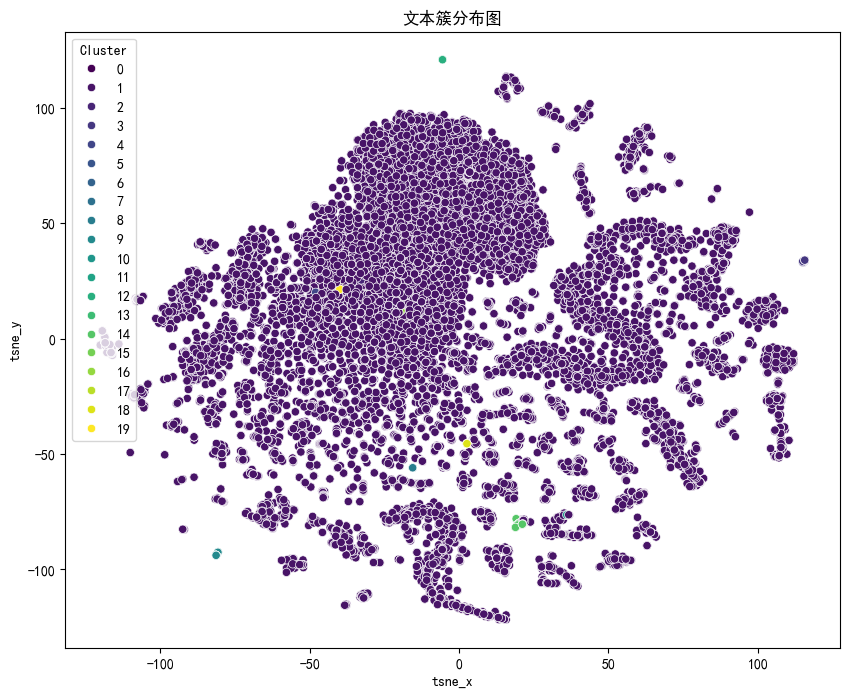

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 读取停用词列表
with open('hit_stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = [line.strip() for line in file.readlines()]

# 设置中文字体，确保图形中的中文可以正确显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 使用TF-IDF向量化器将文本数据转换为数值特征
vectorizer = TfidfVectorizer(stop_words=stop_words)  # 使用自定义停用词列表
X = vectorizer.fit_transform(df_features['content'].astype(str))

# 使用K均值进行聚类，假设你想要分为k个簇
k = 20  # 设定簇的数量
kmeans = KMeans(n_clusters=k, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(X)

# 使用TruncatedSVD进行降维预处理
svd = TruncatedSVD(n_components=50, random_state=42)  # 将维度减少到50
X_reduced = svd.fit_transform(X)

# 使用t-SNE进行文本数据的降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)  # 使用降维后的数据

# 将降维后的数据添加到DataFrame中
df_features['tsne_x'] = X_tsne[:, 0]
df_features['tsne_y'] = X_tsne[:, 1]

# 使用seaborn绘制簇的分布图
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='Cluster', data=df_features, palette='viridis', legend='full')
plt.title('文本簇分布图')  # 中文标题现在应该能正确显示了
plt.show()


## 用网页样式互动输出的文本簇分布图（KMeans）

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD  # 导入TruncatedSVD用于降维预处理
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

# 使用TF-IDF向量化器将文本数据转换为数值特征
vectorizer = TfidfVectorizer(stop_words=list(stop_words))  # 如果有自定义分词函数，则添加 tokenizer=tokenize
X = vectorizer.fit_transform(df_features['content'].astype(str))

# 使用K均值进行聚类，假设你想要分为k个簇
k = 8  # 设定簇的数量
kmeans = KMeans(n_clusters=k, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(X)

# 使用TruncatedSVD进行降维预处理
svd = TruncatedSVD(n_components=50, random_state=42)  # 将维度减少到50
X_reduced = svd.fit_transform(X)

# 使用t-SNE进行文本数据的降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)  # 使用降维后的数据

# 将降维后的数据添加到DataFrame中
df_features['tsne_x'] = X_tsne[:, 0]
df_features['tsne_y'] = X_tsne[:, 1]

# 创建一个DataFrame用于绘图
plot_df = pd.DataFrame({
    'tsne_x': df_features['tsne_x'],
    'tsne_y': df_features['tsne_y'],
    'Cluster': df_features['Cluster']
})

# 使用Plotly Express绘制交互式散点图
fig = px.scatter(plot_df, x='tsne_x', y='tsne_y', color='Cluster',
                 title='文本簇分布图', 
                 color_continuous_scale=px.colors.sequential.Viridis,
                 hover_data=['Cluster'])  # 添加悬停信息显示簇编号

# 显示图表
try:
    fig.show()  # 尝试直接显示图表
except ValueError as e:
    print(f"Error displaying figure: {e}")
    fig.write_html("cluster_distribution.html")  # 如果失败则保存为HTML文件

c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'lex', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.



## 通过silhouette_score函数据计算轮廓系数

In [31]:
from sklearn.metrics import silhouette_score  # 导入 silhouette_score 函数，用于计算轮廓系数

# 尝试不同的聚类数目 k，从2到9
for k in range(20, 30):  # 循环遍历2到9的整数
    # 创建一个 KMeans 实例，设置聚类数目为当前的 k，并设置随机种子为42，以保证结果的可重复性
    kmeans = KMeans(n_clusters=k, random_state=42)
    # 使用 KMeans 模型对数据集 X 进行聚类，并返回聚类标签
    labels = kmeans.fit_predict(X)
    # 计算当前聚类数目下的轮廓系数
    score = silhouette_score(X, labels)
    # 打印当前聚类数目和对应的轮廓系数
    print(f'Number of clusters: {k}, Silhouette Score: {score}')

Number of clusters: 20, Silhouette Score: 0.005913644049863331
Number of clusters: 21, Silhouette Score: 0.00553331251135324
Number of clusters: 22, Silhouette Score: 0.005623529986466658
Number of clusters: 23, Silhouette Score: 0.005935423122525978
Number of clusters: 24, Silhouette Score: 0.006208713739138252
Number of clusters: 25, Silhouette Score: 0.006013393261721709
Number of clusters: 26, Silhouette Score: 0.006455654646715379
Number of clusters: 27, Silhouette Score: 0.006543227674983463
Number of clusters: 28, Silhouette Score: 0.0069363672692061016
Number of clusters: 29, Silhouette Score: 0.007095754935113819


# DBSCAN 文本簇分布图

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import jieba

# 假设 'comment_content' 列包含文本数据
df_features = data

# 使用jieba分词，并将停用词加载进来
def tokenize(text):
    return [word for word in jieba.cut(text) if word not in stop_words]

# 加载停用词
stop_words_path = 'hit_stopwords.txt'
with open(stop_words_path, 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 使用TF-IDF向量化器将文本数据转换为数值特征
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words)
X = vectorizer.fit_transform(df_features['content'].astype(str))  # 确保文本列的数据类型为字符串

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # 根据需要调整参数
df_features['Cluster'] = dbscan.fit_predict(X)

# 打印每个簇的文本索引
clusters = {}
for cluster in set(df_features['Cluster']):
    if cluster != -1:
        clusters[cluster] = list(df_features[df_features['Cluster'] == cluster].index)

for cluster, indices in clusters.items():
    print(f'Cluster {cluster}: {indices}')


c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [' ', '##', '--', '.', 'exp', 'lex', '~', '±', '÷', 'β', 'δ', 'λ', 'ξ', 'ψ', 'в', '…', '′', '″', '℃', 'ⅲ', '∈', '∧', '∪', '≈', '─', '☆', '㈧', '下', '不', '使', '元', '只', '吨', '唷', '啪', '喔', '天', '数', '日', '昉', '末', '漫', '特', '见', '设', '说', '达', '０', '１', '２', '３', '５', 'ａ', 'ｂ', 'ｃ', 'ｄ', 'ｅ', 'ｆ', 'ｇ', 'ｈ', 'ｉ', 'ｊ', 'ｌ', 'ｎ', 'ｏ', 'ｒ', 'ｔ', 'ｘ', 'ｚ', '｛', '｜'] not in stop_words.



Cluster 0: [34, 45, 73, 125, 173, 11488, 11498, 11506, 11567, 11568, 11590, 17183, 17190, 17199]
Cluster 1: [44, 46, 85, 89, 101, 102, 124, 126, 149, 159, 11447, 11455, 11514]
Cluster 2: [48, 52, 54, 59, 60, 61, 64, 66, 68, 71, 104, 105, 106, 107, 108, 110, 118, 119, 128, 132, 134, 139, 143, 160, 161, 164, 166, 168, 171, 11440, 11502, 13635]
Cluster 3: [198, 2578, 13452, 13492, 13590]
Cluster 4: [200, 220, 230, 240, 250, 260, 270, 280, 290, 300, 11099, 11119, 11130, 11141, 11152, 11163, 11174, 11185, 11196, 11207]
Cluster 5: [206, 221, 231, 241, 251, 261, 271, 281, 291, 301, 11105, 11120, 11131, 11142, 11153, 11164, 11175, 11186, 11197, 11208]
Cluster 6: [207, 1007, 1035, 1036, 1155, 1250, 1326, 1685, 1815, 1913, 2213, 2579, 2597, 2680, 2685, 3019, 3337, 3411, 3477, 3944, 4075, 4475, 4759, 4761, 4779, 4781, 4799, 4809, 4877, 4922, 6062, 6191, 6290, 7108, 7728, 7876, 9820, 9863, 9975, 10682, 11379, 12077, 12167, 12188, 12253, 12271, 12327, 12922, 13024, 13322, 13420, 13903, 13978, 14174

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD  # 导入TruncatedSVD用于降维预处理
from sklearn.manifold import TSNE
import plotly.express as px

# 加载数据
filtered_movies = pd.read_csv('processed_weibo.csv')['content'].reset_index()
df_features = filtered_movies

# 使用jieba分词，并将停用词加载进来
def tokenize(text):
    return [word for word in jieba.cut(text) if word not in stop_words]

# 加载停用词
stop_words_path = 'hit_stopwords.txt'
with open(stop_words_path, 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 使用TF-IDF向量化器将文本数据转换为数值特征
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words)
X = vectorizer.fit_transform(df_features['content'].astype(str))  # 确保文本列的数据类型为字符串

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # 根据需要调整参数
df_features['Cluster'] = dbscan.fit_predict(X)

# 使用TruncatedSVD进行降维预处理
svd = TruncatedSVD(n_components=50, random_state=42)  # 将维度减少到50
X_reduced = svd.fit_transform(X)

# 使用t-SNE进行文本数据的降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)  # 使用降维后的数据

# 将降维后的数据添加到DataFrame中
df_features['tsne_x'] = X_tsne[:, 0]
df_features['tsne_y'] = X_tsne[:, 1]

# 创建一个DataFrame用于绘图
plot_df = pd.DataFrame({
    'tsne_x': df_features['tsne_x'],
    'tsne_y': df_features['tsne_y'],
    'Cluster': df_features['Cluster']
})

# 使用Plotly Express绘制交互式散点图
fig = px.scatter(plot_df, x='tsne_x', y='tsne_y', color='Cluster',
                 title='文本簇分布图 (DBSCAN)', 
                 color_continuous_scale=px.colors.sequential.Viridis,
                 hover_data=['Cluster'])  # 添加悬停信息显示簇编号

# 显示图表
try:
    fig.show()  # 尝试直接显示图表
except ValueError as e:
    print(f"Error displaying figure: {e}")
    fig.write_html("cluster_distribution_dbscan.html")  # 如果失败则保存为HTML文件

c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [' ', '##', '--', '.', 'exp', 'lex', '~', '±', '÷', 'β', 'δ', 'λ', 'ξ', 'ψ', 'в', '…', '′', '″', '℃', 'ⅲ', '∈', '∧', '∪', '≈', '─', '☆', '㈧', '下', '不', '使', '元', '只', '吨', '唷', '啪', '喔', '天', '数', '日', '昉', '末', '漫', '特', '见', '设', '说', '达', '０', '１', '２', '３', '５', 'ａ', 'ｂ', 'ｃ', 'ｄ', 'ｅ', 'ｆ', 'ｇ', 'ｈ', 'ｉ', 'ｊ', 'ｌ', 'ｎ', 'ｏ', 'ｒ', 'ｔ', 'ｘ', 'ｚ', '｛', '｜'] not in stop_words.



Error displaying figure: Mime type rendering requires nbformat>=4.2.0 but it is not installed


# BETOPIC

In [38]:
import pandas as pd
import jieba
from bertopic import BERTopic
from tqdm import tqdm

# 加载数据
data = pd.read_csv('processed_weibo.csv')
data = data.dropna(subset=['content'])  # 确保 'content' 列没有缺失值

# 加载停用词
stop_words = []
stop_words_path = 'hit_stopwords.txt'
with open(stop_words_path, 'r', encoding='utf-8') as file:
    for row in file.readlines():
        stop_words.append(row.strip())

# 定义分词函数
def tokenize(text):
    try:
        words = [word for word in jieba.cut(text) if word not in stop_words]
        return ' '.join(words)
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return ''

# 使用自己的停用词列表处理数据
data['clean_text'] = data['content'].apply(tokenize)
docs = data['clean_text'].values.tolist()

# 调试代码：检查是否有空字符串或非字符串元素
non_string_elements = [doc for doc in docs if not isinstance(doc, str)]
empty_strings = [doc for doc in docs if doc == '']
if non_string_elements:
    print("Found non-string elements in 'docs':")
    print(non_string_elements)
if empty_strings:
    print("Found empty strings in 'docs':")
    print(empty_strings)

# 移除空字符串
docs = [doc for doc in docs if doc]

# 再次确保 docs 中的每个元素都是字符串
assert all(isinstance(doc, str) for doc in docs), "The 'docs' list contains non-string elements."

# 训练模型并指定主题数量
#model = BERTopic(language="chinese (simplified)", calculate_probabilities=True, min_topic_size=20, nr_topics=60)
model = BERTopic(language="chinese (simplified)", calculate_probabilities=True, min_topic_size=20)
topics, probabilities = model.fit_transform(docs)

# 创建结果DataFrame
df_topics = pd.DataFrame(zip(topics, probabilities), columns=["Topic", "Probability"])
df_topics['id'] = data.index  # 如果有其他ID列，请使用正确的列名

# 可视化主题（已经减少到30个主题）
fig = model.visualize_topics()
try:
    fig.show()  # 尝试直接显示图表
except ValueError as e:
    print(f"Error displaying topics figure: {e}")
    fig.write_html("bertopic_visualization.html")  # 如果失败则保存为HTML文件


Error displaying topics figure: Mime type rendering requires nbformat>=4.2.0 but it is not installed


In [7]:
print(result_df)

Empty DataFrame
Columns: [Topic, Probability, id]
Index: []


In [40]:
import pandas as pd
import json

# 假设 topics 和 probabilities 已经定义
# 示例数据：
topics = ["Topic 1", "Topic 2", "Topic 3"]
probabilities = [[0.1, 0.2, 0.7], [0.4, 0.4, 0.2], [0.8, 0.1, 0.1]]

# 将包含主题和对应概率的数据转换成 DataFrame
df_topics = pd.DataFrame(zip(topics, probabilities), columns=["Topic", "Probability"])

# 准备 ECharts 数据结构
echarts_data = []
for index, row in df_topics.iterrows():
    # 如果 Probability 是一个列表，则直接使用；如果是 numpy 数组，则转换为列表
    prob_list = row["Probability"].tolist() if hasattr(row["Probability"], 'tolist') else row["Probability"]
    echarts_data.append({"Topic": row["Topic"], "Probability": prob_list})

# 将数据转换为 JSON 格式
echarts_json = json.dumps(echarts_data, ensure_ascii=False)  # 使用 ensure_ascii=False 保证中文字符正确显示

print(echarts_json)

[{"Topic": "Topic 1", "Probability": [0.1, 0.2, 0.7]}, {"Topic": "Topic 2", "Probability": [0.4, 0.4, 0.2]}, {"Topic": "Topic 3", "Probability": [0.8, 0.1, 0.1]}]


In [41]:
#生成一个名为 echarts_data.json 的文件包含了之前转换好的 JSON 数据
with open('echarts_data.json', 'w', encoding='utf-8') as json_file:
    json.dump(echarts_data, json_file, ensure_ascii=False)

# LDA

In [27]:
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models as pyg
from sklearn.feature_extraction.text import CountVectorizer
from gensim import models, corpora
import jieba
import re

# 加载数据
data = pd.read_csv('processed_weibo.csv')

# 读取停用词列表
with open('hit_stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = set([line.strip() for line in file.readlines()])
    
# 确保 stop_words 是一个真正的列表
stop_words = list(stop_words)

# 定义分词函数
def tokenize(text):
    # 使用正则表达式去除非中文字符
    text = re.sub(r'[^\u4e00-\u9fa5]+', ' ', text)
    # 使用 jieba 分词
    words = jieba.cut(text)
    # 过滤停用词和单个字的词项
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(filtered_words)

# 对 content 列进行分词处理，并创建一个清洁文本列
data['clean_text'] = data['content'].apply(tokenize)

# 使用 CountVectorizer 创建词项频率矩阵
tf_vectorizer = CountVectorizer(strip_accents='unicode', stop_words=stop_words)
dtm_tf = tf_vectorizer.fit_transform(data['clean_text'])

# 创建 Gensim 需要的字典和语料库
id2word = corpora.Dictionary([text.split() for text in data['clean_text']])
corpus = [id2word.doc2bow(text.split()) for text in data['clean_text']]

# 使用 Gensim 创建 LDA 模型
lda_model = models.LdaModel(corpus, num_topics=20, id2word=id2word, random_state=0)

# 准备 LDA 可视化数据
vis_data = pyg.prepare(lda_model, corpus, id2word)

# 将可视化数据保存到 HTML 文件中
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

# 将可视化数据转换为 DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# 初始化一个空的 DataFrame，用于存储最终的主题模型分析结果
result_df = pd.DataFrame(columns=["Term", "Freq", "Total", "Category", "logprob", "loglift", "id"])

# 将主题信息添加到 result_df
result_df = pd.concat([result_df, topic_info_df], ignore_index=True)

# 重置索引，以便保存 DataFrame 时没有重复的索引
result_df.reset_index(drop=True, inplace=True)

# 将结果保存到 CSV 文件中，不包含索引列
result_df.to_csv('merged_results2.csv', index=False)

print("分析完成，结果已保存到 merged_results2.csv 和 lda_visualization.html")


c:\Users\ASUS\Desktop\LDA和Bertopic可视化\myenv310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1a', '1b', '1c', '1d', '1e', '1f', '1g', '1h', '1i', '1o', '21', '210', '22', '23', '24', '25', '26', '27', '28', '2a', '2b', '2c', '2d', '2e', '2f', '2g', '2h', '2i', '2j', '31', '310', '3a', '3b', '3c', '3d', '3e', '3f', '3g', '3h', '4a', '4b', '4c', '4d', '4e', '5a', '5b', '5d', '5e', '5f', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'iii', 'isn', 'lex', 'li', 'll', 'mon', 'ng昉', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'zxfitl'] not in stop_words.
  warnings.warn(


分析完成，结果已保存到 merged_results2.csv 和 lda_visualization.html


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6436\2134330571.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, topic_info_df], ignore_index=True)


In [5]:
result_df

,Term,Freq,Total,Category,logprob,loglift,id
0,cn,10096.000000,10096.000000,Default,20.0000,20.0000,NaN
1,http,10103.000000,10103.000000,Default,19.0000,19.0000,NaN
2,冲突,3571.000000,3571.000000,Default,18.0000,18.0000,NaN
3,以色列,2451.000000,2451.000000,Default,17.0000,17.0000,NaN
4,##,7423.000000,7423.000000,Default,16.0000,16.0000,NaN
...,...,...,...,...,...,...,...
767,容易,126.751973,293.678283,Topic20,-4.7055,2.7911,NaN
768,恢复,105.745187,210.603718,Topic20,-4.8867,2.9424,NaN
769,访问,85.190283,181.153811,Topic20,-5.1029,2.8769,NaN
770,27,80.755837,265.929609,Topic20,-5.1563,2.4396,NaN


In [9]:
pyLDAvis.save_json(vis_data, 'output.json')

In [ ]:
import mysql.connector
import json
import pyLDAvis
import pyLDAvis.gensim as pyg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import models, corpora

# Assuming vis_data is the output of pyLDAvis.prepare or pyLDAvis.gensim.prepare
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Convert the vis_data to a JSON string
visualization_json = json.dumps(vis_data.to_dict())

# Save to MySQL database
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='123456',
    database='aidb'
)

cursor = connection.cursor()

# Assuming you have a table 'topic_visualization' with columns 'id' and 'visualization_data'
insert_query = "INSERT INTO topic_visualization (visualization_data) VALUES (%s)"
data_to_insert = (visualization_json,)

cursor.execute(insert_query, data_to_insert)

# Commit the changes and close the connection
connection.commit()
cursor.close()
connection.close()


In [10]:
import pyLDAvis
import pyLDAvis.gensim as pyg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import models, corpora
result_df = pd.DataFrame(columns=["Term", "Freq",'Total','Category','logprob','loglift','id'])


names = set(data['movie_name'].tolist())
names = list(names)
for name in tqdm(names[:2]):
    try:
        filtered_movies = data[data['movie_name'].str.contains(name)]
        filtered_movies['clean_text'] = filtered_movies['comment_content'].apply(tokenize)
        df = filtered_movies
        
        
        tf_vectorizer = CountVectorizer(strip_accents='unicode', stop_words=stop_words)
        id2word = corpora.Dictionary([text.split() for text in df['clean_text']])
        corpus = [id2word.doc2bow(text.split()) for text in df['clean_text']]
        lda_model = models.LdaModel(corpus, num_topics=20, id2word=id2word)
        # pyLDAvis.enable_notebook()
        vis_data = pyg.prepare(lda_model, corpus, id2word)
        topic_info_df = pd.DataFrame(vis_data.topic_info)
        topic_info_df['id'] = [filtered_movies['movie_id'].index[0] for i in range(len(topic_info_df))]
        result_df = pd.concat([topic_info_df, result_df])
    except RuntimeError as e:
        continue
    except TypeError as e2:
        continue
    except ValueError as e3:
        continue
result_df.reset_index(drop=True, inplace=True)
result_df.to_csv('merged_results2.csv', index=False)

100%|██████████| 2/2 [00:05<00:00,  2.64s/it]
